# VC_P6_AnálisisFacial
Trabajo realizado por:  
- **Giovanni Sgambato** y **Agata Cavigioli**
  
  https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/



### Paquetes y Funciones Necesarios  
Importa paquete utilizados (DeepFace OpenCV, numPy, matPlot ecc...)

In [4]:

#Install DeepFace Library
!pip install deepface

In [5]:
#Import DeepFace, CV2 and Matplotlib libraries
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

In [6]:
# Método que coloca dos imágenes en una misma figura
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)
    plt.show()


def convert_and_plot_image(image_path):
    # Apri l'immagine utilizzando PIL
    img = Image.open(filename)

    # Converti l'immagine in un array NumPy
    img_array = np.array(img)

    # Mostra l'immagine utilizzando Matplotlib
    #plt.imshow(img_array)
    #plt.axis('off')
    #plt.show()

    return(img_array)



# Ejercicio #1
Analisis de Cara con DeepFace de imagens cargada o frame de webcam

### Imagenes Locales
Aqui se pueden cargar imagenes guardada localmente en tu ordenador (en Colab serà temporanea en cada runtime)

In [20]:
#Upload imagen
from google.colab import files
uploaded = files.upload()

Saving brad_1.jpg to brad_1.jpg


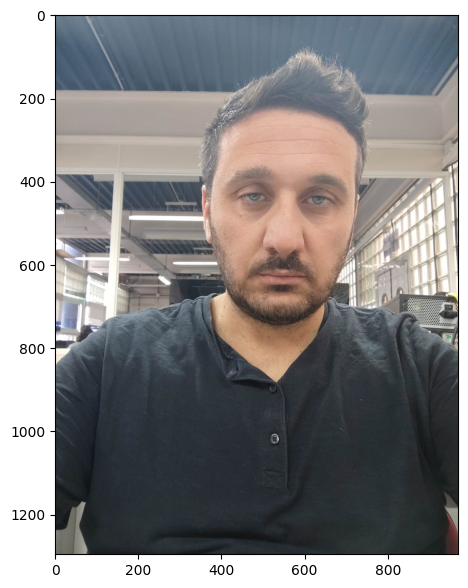

In [8]:
#Check imagen cargada

check_img = cv2.imread('img_1.jpg')

plt.figure(figsize=(7,7))
plt.imshow(check_img[:, :, ::-1])
#print(check_img)

In [9]:
#DeepFace --> analizar imagen

analyze_face = DeepFace.analyze(check_img)

24-01-04 13:10:11 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 30.9MB/s]


24-01-04 13:10:15 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:06<00:00, 84.3MB/s]


24-01-04 13:10:26 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:05<00:00, 94.8MB/s]


24-01-04 13:10:38 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:02<00:00, 233MB/s]
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


In [10]:
#Print de resultados

analyze_face

[{'emotion': {'angry': 9.240441769361496,
   'disgust': 0.003220851067453623,
   'fear': 14.864450693130493,
   'happy': 0.0019373850591364317,
   'sad': 70.57726979255676,
   'surprise': 0.010468142136232927,
   'neutral': 5.302215367555618},
  'dominant_emotion': 'sad',
  'region': {'x': 313, 'y': 245, 'w': 492, 'h': 492},
  'face_confidence': 4.8903190667624585,
  'age': 40,
  'gender': {'Woman': 0.0017887972717289813, 'Man': 99.99821186065674},
  'dominant_gender': 'Man',
  'race': {'asian': 0.5984238348901272,
   'indian': 15.745626389980316,
   'black': 0.8473842404782772,
   'white': 17.234475910663605,
   'middle eastern': 46.41985893249512,
   'latino hispanic': 19.154231250286102},
  'dominant_race': 'middle eastern'}]

In [11]:
#Dominant Emotion

#analyze_face['dominant_emotion']
dominant_emotion = analyze_face[0]['dominant_emotion']
print(dominant_emotion)

sad


#### Hack WebCam  

**GoogleColab** de momento (dec 2023) **NO permite** utilizar webcam y stream video en tiempo real, directamente.  

* Con el siguiente "hack" se puede acceder a la webcam y sacar un fotograma para utilizarlo en la analisi de DeepFace


* Recursos:  
https://answers.opencv.org/question/231737/videocapture-in-colab/
https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq  
https://colab.research.google.com/drive/1fwqYCxcgEkWTpIgvdLGzJCSYcMI7c3xF?usp=sharing#scrollTo=xS_KFScRb1gv


In [12]:
#nice stuff here -- giovanni 01/12/2023

#https://answers.opencv.org/question/231737/videocapture-in-colab/
#https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#### Frame  
Aqui es posible sacar un "selfie" desde la webcam del notebook

In [ ]:
#Captura de un frame con "hack" de la webcam

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
# Sostituisci 'filename' con il percorso dell'immagine


<IPython.core.display.Javascript object>

In [14]:
#DeepFace analyse the uploaded

filename = 'photo.jpg'
print(filename)
img_ok = np.array(filename)    #converte en imagen uint8 por matplotlib
print('type: ',type(filename), type(img_ok),'\n')

analyze_face = DeepFace.analyze(filename)

#Print all analysis of an image
analyze_face

photo.jpg
type:  <class 'str'> <class 'numpy.ndarray'> 



Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


[{'emotion': {'angry': 0.01922933297464624,
   'disgust': 1.3317182911976033e-07,
   'fear': 0.026623450685292482,
   'happy': 0.000490684305987088,
   'sad': 0.12805326841771603,
   'surprise': 0.00031313716135628056,
   'neutral': 99.82529282569885},
  'dominant_emotion': 'neutral',
  'region': {'x': 195, 'y': 168, 'w': 168, 'h': 168},
  'face_confidence': 5.896653076575603,
  'age': 31,
  'gender': {'Woman': 0.0005952163974143332, 'Man': 99.99940395355225},
  'dominant_gender': 'Man',
  'race': {'asian': 1.242135837674141,
   'indian': 6.9754913449287415,
   'black': 0.8957164362072945,
   'white': 39.70656394958496,
   'middle eastern': 39.09774422645569,
   'latino hispanic': 12.082353979349136},
  'dominant_race': 'white'}]

In [15]:
#Print de resultados

#analyze_face['dominant_emotion']
dominant_emotion = analyze_face[0]['dominant_emotion']

# Edad, Raza, Género
age = analyze_face[0]['age']
race = analyze_face[0]['dominant_race']
gen = analyze_face[0]['dominant_gender']

print('Dominant emotion: ', dominant_emotion)
print('Dominant Race: ', race)
print('Dominant Gender: ', gen)
print('Age: ', age)

Dominant emotion:  neutral
Dominant Race:  white
Dominant Gender:  Man
Age:  31


<class 'str'>


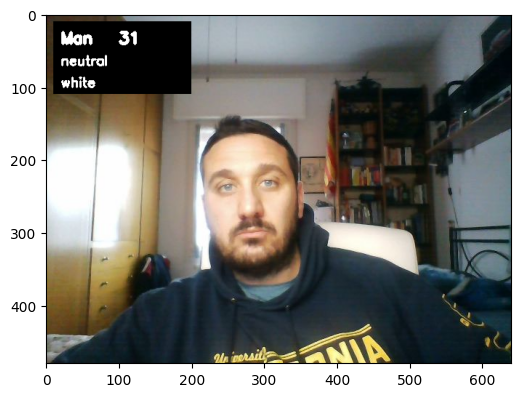

In [16]:
#Conversione de openCV de BGR a RGB
img = cv2.imread(filename)
img_txt = img.copy()
img_txt = cv2.cvtColor(img_txt, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (0, 0), None, 0.18, 0.18)
#w, h, c = img.shape

#fondo nero
img_txt[10:110, 10:200] = np.zeros((100, 190, 3))

#label
cv2.putText(img_txt, str(gen), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 3)
cv2.putText(img_txt, str(age), (100, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 3)
cv2.putText(img_txt, str(dominant_emotion), (20, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
cv2.putText(img_txt, str(race), (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

#plot_images(img, img_txt)
plt.figure(figsize=(6,6))
plt.imshow(img_txt)

print(type(filename))


## Verifica si es la misma persona (y BradPitt Test)
https://medium.com/nerd-for-tech/deep-face-recognition-in-python-41522fb47028

In [18]:
#basica
def verify(img1_path,img2_path):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)

    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    output = DeepFace.verify(img1_path,img2_path) # <---deepface
    print(output)

    verification = output['verified']
    if verification:
       print('SAME PERSON')
    else:
       print('The are not the same!')

#esta version permite elegir un model
def verify2(img1_path,img2_path,model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    output=DeepFace.verify(img1_path,img2_path,model_name=model_name) # <---deepface
    print(output)

    verification = output['verified']
    if verification:
      print('SAME PERSON')
    else:
     print('The are not the same!')


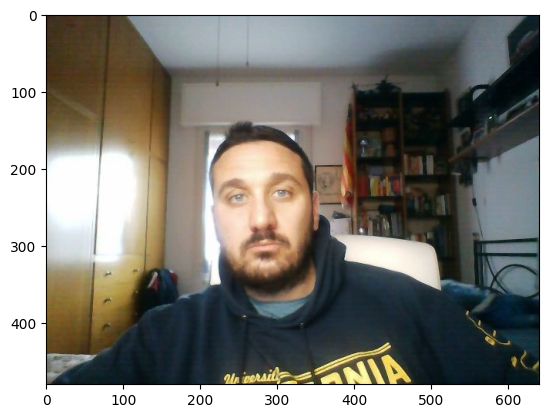

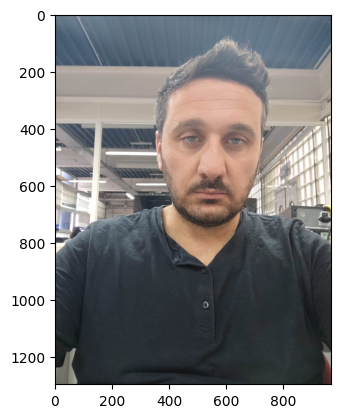

{'verified': True, 'distance': 0.15218274114257968, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 195, 'y': 168, 'w': 168, 'h': 168}, 'img2': {'x': 313, 'y': 245, 'w': 492, 'h': 492}}, 'time': 2.2}
SAME PERSON


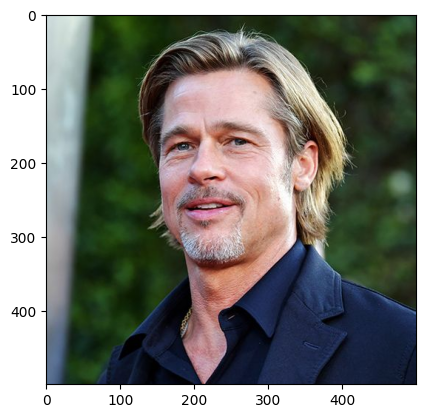

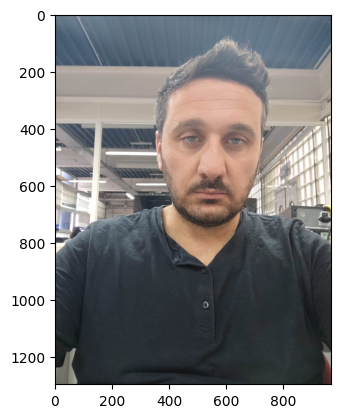

{'verified': False, 'distance': 0.4389518281430568, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 112, 'y': 86, 'w': 224, 'h': 224}, 'img2': {'x': 313, 'y': 245, 'w': 492, 'h': 492}}, 'time': 3.47}
The are not the same!


In [21]:
#Let’s call the verify function

#confronta frame de webcam con imagen upload
upload_img = 'img_1.jpg'
verify(filename,upload_img)

#Brad Pitt Test (verifica que el sujeto de la imagen no se haya vuelto en bradpitt)
verify('brad_1.jpg',filename)

#version facenet
#verify2(filename,'img_1.jpg',model_name='Facenet')

# Ejercicio #2
Reconoce una persona entre un grupo.  

**Resources**  
Retina face  
https://colab.research.google.com/drive/1TqiZd39Neaf6l9i2tAkQfHwxDtKHgGeK?usp=sharing#scrollTo=3V0TNhWuhh8D  

DeepFace  
https://viso.ai/computer-vision/deepface/  
https://pypi.org/project/deepface/  
https://sefiks.com/2021/04/27/deep-face-detection-with-retinaface-in-python/  
https://github.com/serengil/deepface






## Mas Paquetes y Funciones Necesarios
RetinaFace

In [45]:
!pip install retina-face

In [46]:
#Import Retinaface, CV2 and Matplotlib
from retinaface import RetinaFace


## Cargar foto de grupo

In [42]:
#Download an Image file
from google.colab import files
from google.colab.patches import cv2_imshow
uploaded = files.upload()

Saving retina_gio2.jpg to retina_gio2.jpg


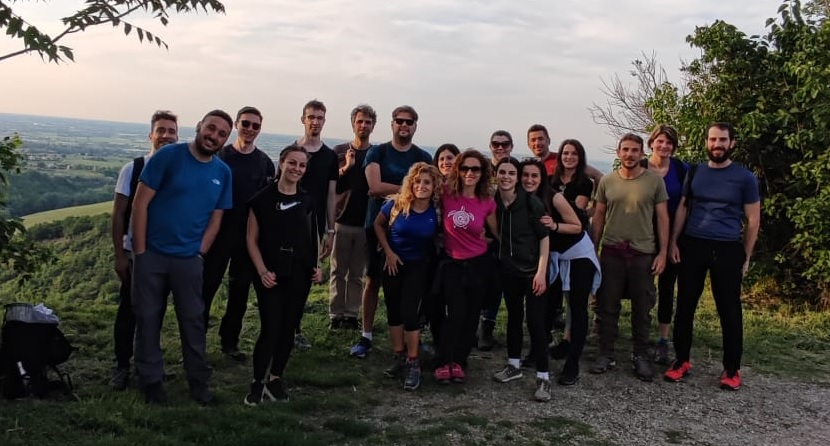

In [43]:
#Read and display the image
#img = cv2.imread('crowd-of-masked1.jpg')
img = cv2.imread('retina_gio2.jpg')
cv2_imshow(img)

## Deteccion
RetinaFace reconoce todas la caras entre un grupo de sujetos en la imagen

In [47]:
#Detect faces using RetinaFace
img_faces = RetinaFace.detect_faces(img)

retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 95.9MB/s]


In [48]:
#Iterate all objects key areas
for i in img_faces.keys():
  choose = img_faces[i]
  print(choose)

{'score': 0.9996539354324341, 'facial_area': [653, 133, 673, 156], 'landmarks': {'right_eye': [660.038, 141.78188], 'left_eye': [669.0119, 142.97672], 'nose': [664.5357, 146.62935], 'mouth_right': [659.41486, 149.74951], 'mouth_left': [667.4476, 150.73265]}}
{'score': 0.999595582485199, 'facial_area': [198, 117, 229, 152], 'landmarks': {'right_eye': [210.22765, 128.62546], 'left_eye': [222.66258, 135.82182], 'nose': [213.48827, 137.27829], 'mouth_right': [204.72559, 140.13667], 'mouth_left': [214.57433, 145.91301]}}
{'score': 0.999595582485199, 'facial_area': [619, 141, 639, 167], 'landmarks': {'right_eye': [625.04065, 150.12103], 'left_eye': [634.84, 150.7974], 'nose': [629.7331, 155.31833], 'mouth_right': [624.91675, 159.60948], 'mouth_left': [633.6715, 160.15903]}}
{'score': 0.9995051026344299, 'facial_area': [393, 112, 414, 137], 'landmarks': {'right_eye': [399.2208, 121.66047], 'left_eye': [408.9938, 122.21681], 'nose': [404.0428, 126.034645], 'mouth_right': [399.70844, 130.70392]

In [171]:
#Iterate all objects key areas and mark only face area
for i in img_faces.keys():
  facial_parts = img_faces[i]
  #print(choose)
  recognize_face_area = facial_parts["facial_area"]
  cv2.rectangle(img, (recognize_face_area[2], recognize_face_area[3]), (recognize_face_area[0], recognize_face_area[1]), (255, 255, 255), 1)


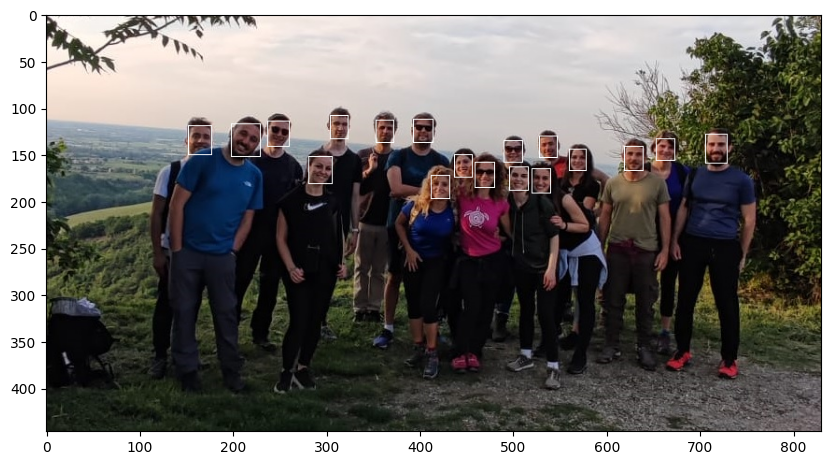

In [172]:
#Display Face Area
plt.figure(figsize= (10, 10))
plt.imshow(img[:, :, ::-1])
plt.show()

In [49]:
#Extract individual faces from the image
import matplotlib.pyplot as plt
#ext_faces = RetinaFace.extract_faces(img_path = "crowd-of-masked1.jpg", align = True)
ext_faces = RetinaFace.extract_faces(img_path = "retina_gio2.jpg", align = True)

Numero de caras detectadas:  18 

Cara numero:  1 
Verified:  False  - Distance:  0.9960531835237311
Not the same!!! 

Cara numero:  2 
Verified:  True  - Distance:  0.5871383522953026
 -----> They are the same person <----- 

Cara numero:  3 
Verified:  False  - Distance:  0.9869283072389957
Not the same!!! 

Cara numero:  4 
Verified:  False  - Distance:  1.0140377218436416
Not the same!!! 

Cara numero:  5 
Verified:  False  - Distance:  0.9347059997571797
Not the same!!! 

Cara numero:  6 
Verified:  False  - Distance:  0.9821403829242976
Not the same!!! 

Cara numero:  7 
Verified:  False  - Distance:  0.9482785070118388
Not the same!!! 

Cara numero:  8 
Verified:  False  - Distance:  1.0239240816607358
Not the same!!! 

Cara numero:  9 
Verified:  False  - Distance:  1.0185481862411447
Not the same!!! 

Cara numero:  10 
Verified:  False  - Distance:  1.0251735771309023
Not the same!!! 

Cara numero:  11 
Verified:  False  - Distance:  0.9512237855991879
Not the same!!! 

Cara n

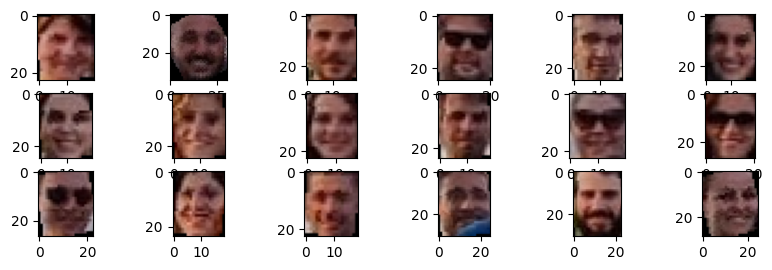

Cara reconocida: numero 2


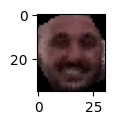

In [51]:
#Immprimir numero de caras detectadas
print('Numero de caras detectadas: ',len(ext_faces), '\n')
fig = plt.figure(figsize=(10, 10))

#Imprimir un sublot de todas las caras identificadas
for i in range(len(ext_faces)):
    plt.subplot(10, 6, i+1)
    plt.imshow(ext_faces[i])
    #output = DeepFace.verify('img_1.jpg',ext_faces[i])
    output = DeepFace.verify('img_1.jpg',ext_faces[i],model_name="ArcFace", enforce_detection=False) # Facenet

    verification = output['verified']
    if verification:
      print('Cara numero: ',i+1,'\nVerified: ',output['verified'],' - Distance: ', output['distance'])
      print(' -----> They are the same person <----- \n')
      recc = i
    else:
      print('Cara numero: ',i+1,'\nVerified: ',output['verified'],' - Distance: ', output['distance'])
      print('Not the same!!! \n')

plt.show()

print('Cara reconocida: numero', recc+1)
plt.figure(figsize= (1, 1))
plt.imshow(ext_faces[recc])
plt.show()





##No utilizado

In [57]:
#funcion basic de verifica

def veriff(img1_path,img2_path):
    img1= cv2.imread(img1_path)
    img2=img2_path

    #for i in range(len(ext_faces)):
    for i in range(2):
      #img2= Image.fromarray(ext_faces[0].astype('uint8'))
      #verify('img_1.jpg', ext_faces[i])

      plt.imshow(img1[:,:,::-1])
      plt.show()
      #plt.imshow(img2[:,:,::-1])
      plt.imshow(img2[i])
      plt.show()
      output = DeepFace.verify('img_1.jpg',img2[i],model_name="ArcFace", enforce_detection=False)

      verification = output['verified']
      if verification:
        print(output)
        print('They are same')
      else:
        print(output)
        print('The are not same')

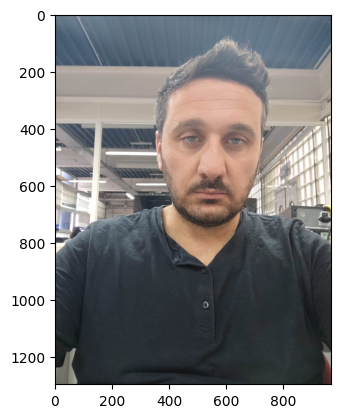

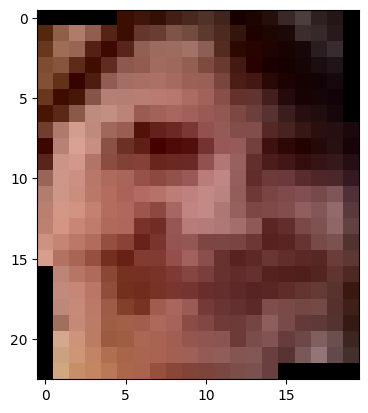

{'verified': False, 'distance': 0.9960531835237311, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 313, 'y': 245, 'w': 492, 'h': 492}, 'img2': {'x': 0, 'y': 0, 'w': 20, 'h': 23}}, 'time': 2.67}
The are not same


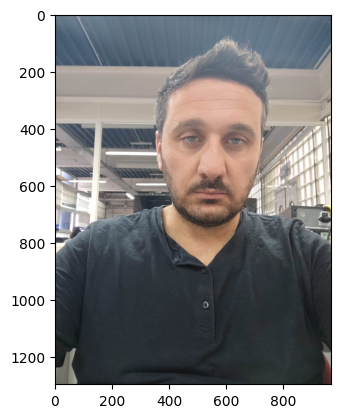

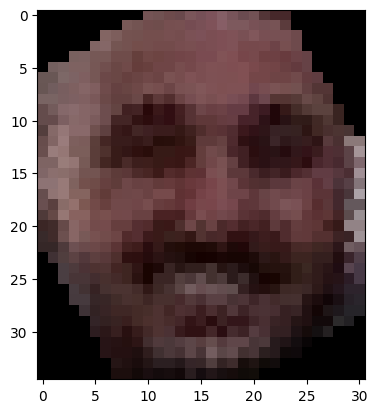

{'verified': True, 'distance': 0.5871383522953026, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 313, 'y': 245, 'w': 492, 'h': 492}, 'img2': {'x': 0, 'y': 0, 'w': 31, 'h': 35}}, 'time': 2.24}
They are same


In [59]:
#Let’s call the verify function
#for i in range(len(ext_faces)):

    #plt.subplot(6, 6, i+1)
    #plt.imshow(ext_faces[i])
veriff(upload_img, ext_faces)



In [128]:
#convertenparray to img
print(type(ext_faces))
from PIL import Image
# Converti l'array NumPy in un oggetto immagine
img_ver= Image.fromarray(ext_faces[0].astype('uint8'))
img_v = Image.fromarray(ext_faces[0].astype('uint8'))
#plt.imshow(img_v)

#deepface output ok
output = DeepFace.verify('img_1.jpg',ext_faces[0],model_name="Facenet", enforce_detection=False)
#DeepFace.verify(sample_image_path, entry_path, model_name="Facenet", enforce_detection=False)
#print(output)

